Инвестиции


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as MAE
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

Объем инвестиций в основной капитал по РФ, % г/г


c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


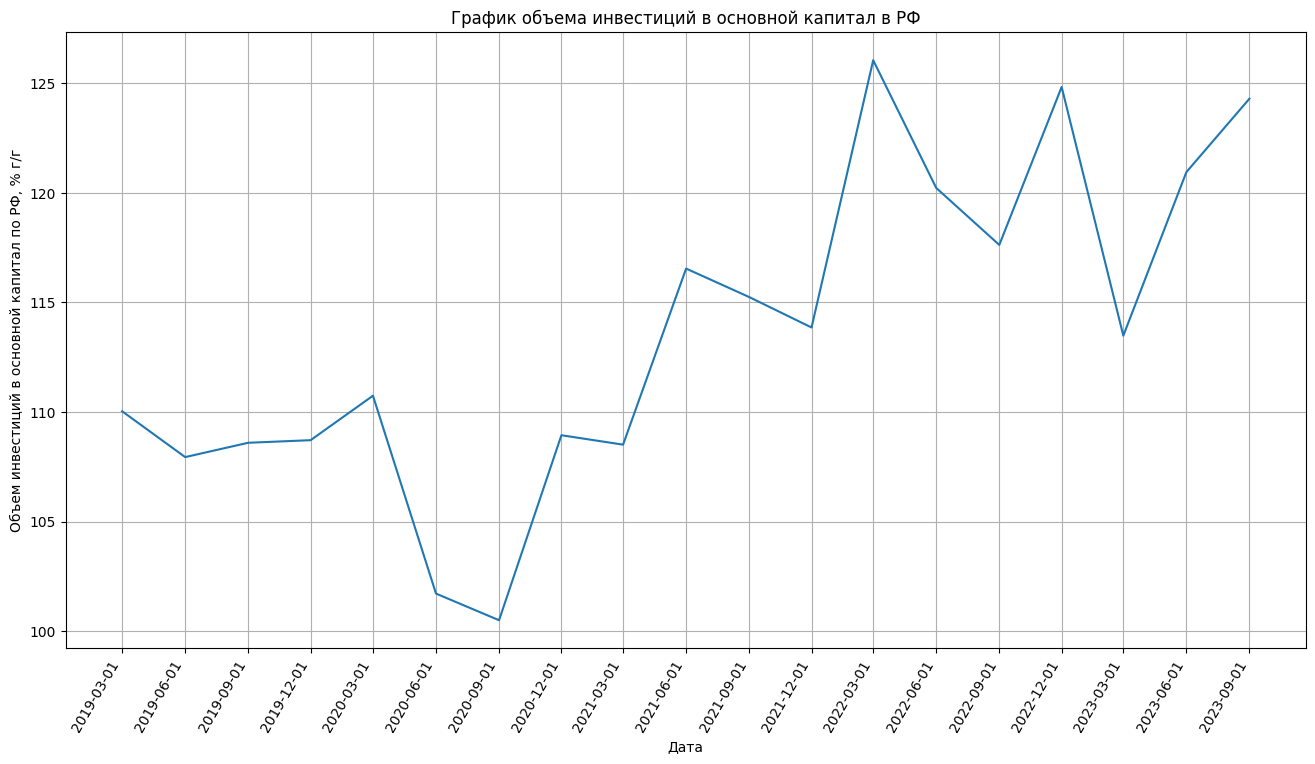

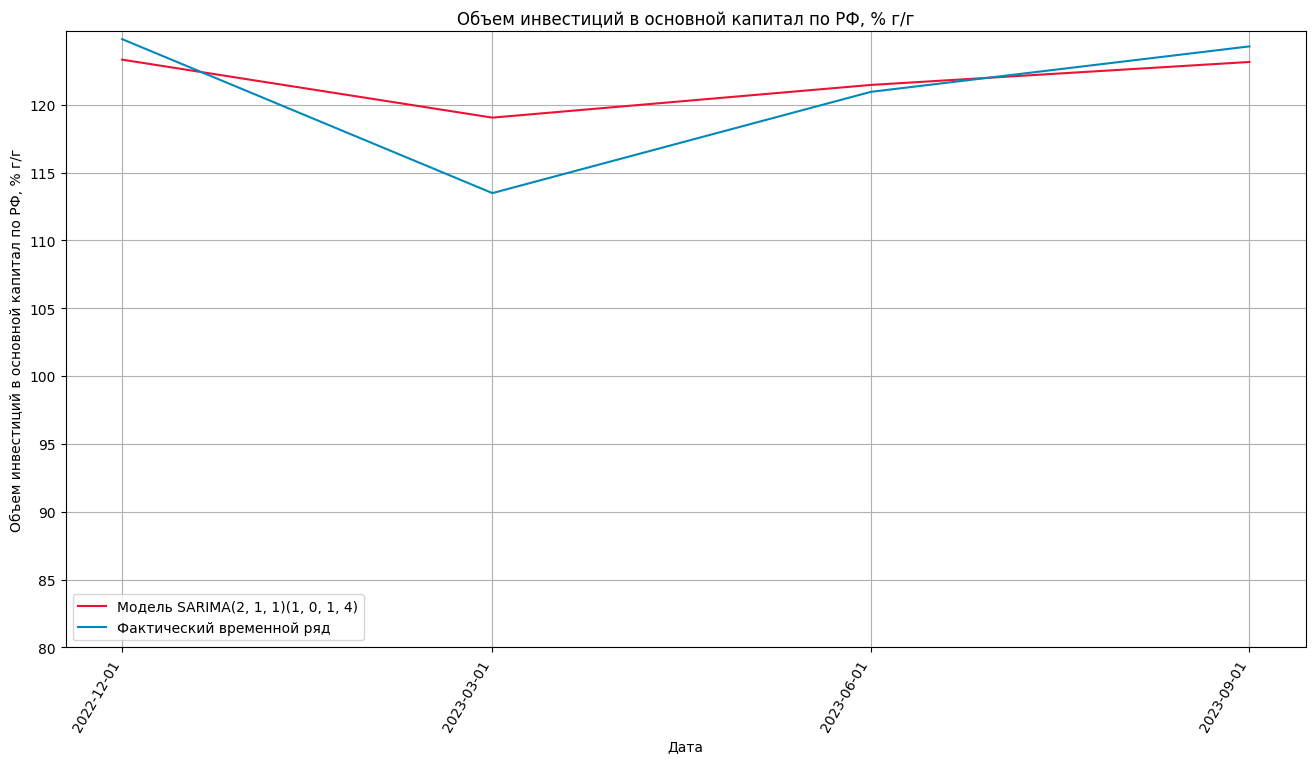

MSE: 8.702138418173691
MAE: 2.183316530778445
R^2: 0.5754617839321878
RMSE: 2.949938714308094


In [44]:
from dateutil import parser
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Объем инвестиций в основной капитал по РФ, % г/г']].copy()

plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Объем инвестиций в основной капитал по РФ, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по РФ, % г/г')  
plt.title('График объема инвестиций в основной капитал в РФ')  


p, d, q = 2, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Объем инвестиций в основной капитал по РФ, % г/г'][:-4], order=(p, d, q), seasonal_order=(1, 0, 1, 4))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Объем инвестиций в основной капитал по РФ, % г/г'][:-4]), end=len(df['Объем инвестиций в основной капитал по РФ, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-4:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(1, 0, 1, 4)')
plt.plot(data_index['Дата'][-4:], data_index['Объем инвестиций в основной капитал по РФ, % г/г'][-4:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-4:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по РФ, % г/г')   
plt.title('Объем инвестиций в основной капитал по РФ, % г/г')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Объем инвестиций в основной капитал по РФ, % г/г'][-4:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Объем инвестиций в основной капитал по РФ, % г/г'][-4:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Объем инвестиций в основной капитал по РФ, % г/г'][-4:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Объем инвестиций в основной капитал по РФ, % г/г'][-4:], SARIMA_predictions)))

In [45]:
with open('investment_rf_yoy.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


15    123.316227
16    119.043904
17    121.453897
Name: predicted_mean, dtype: float64


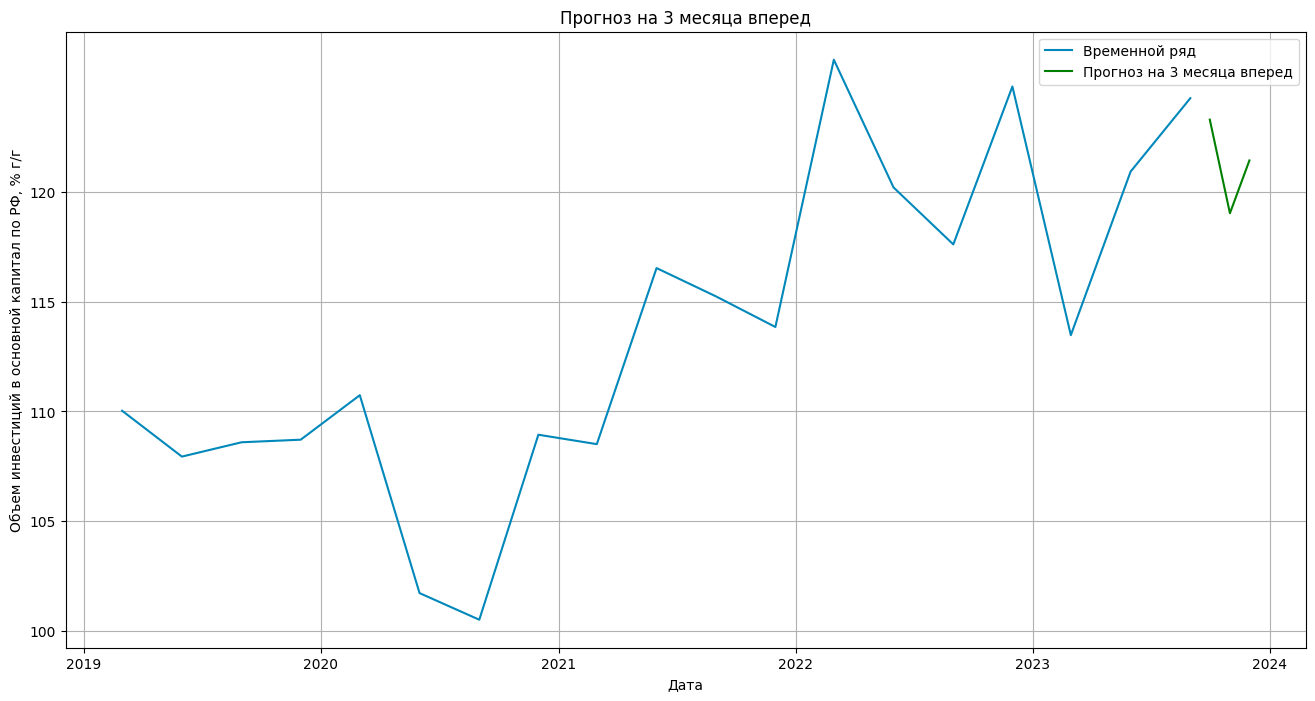

In [33]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по РФ, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по РФ, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Объем инвестиций в основной капитал по Москве, % г/г

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


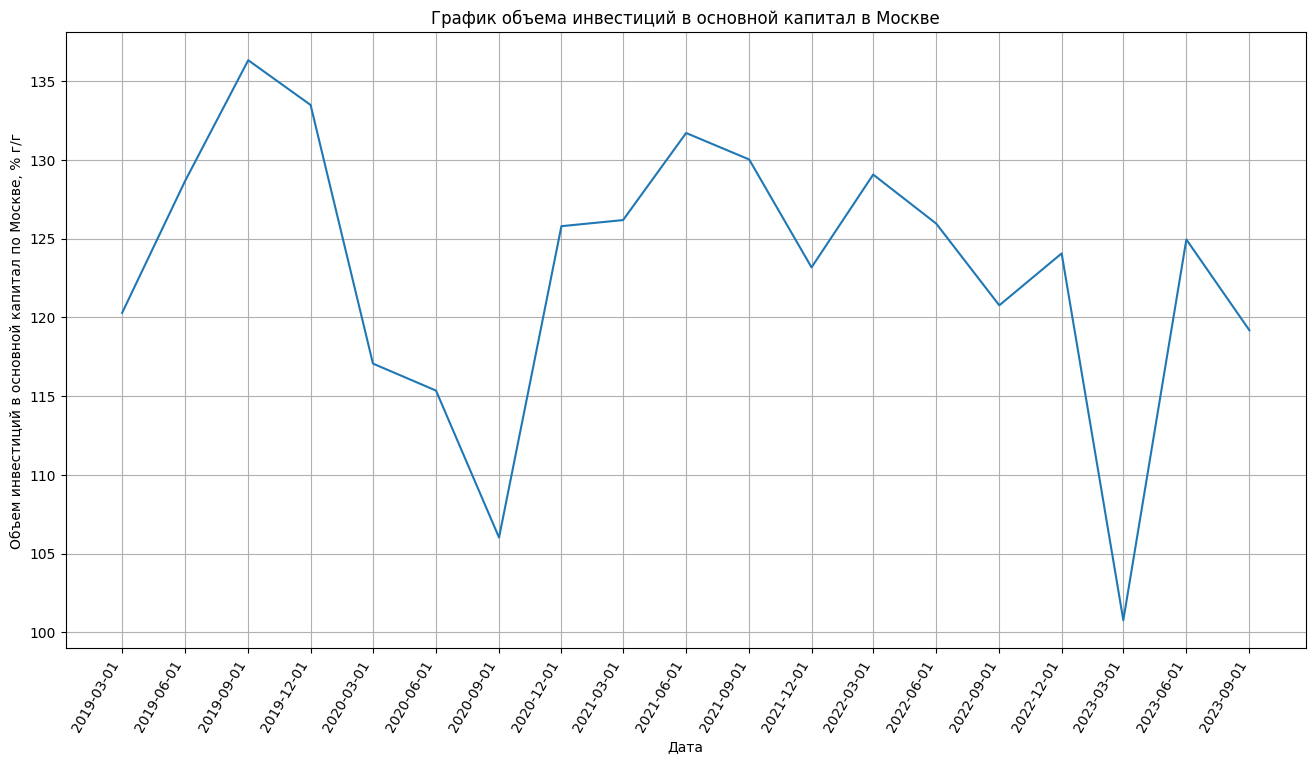

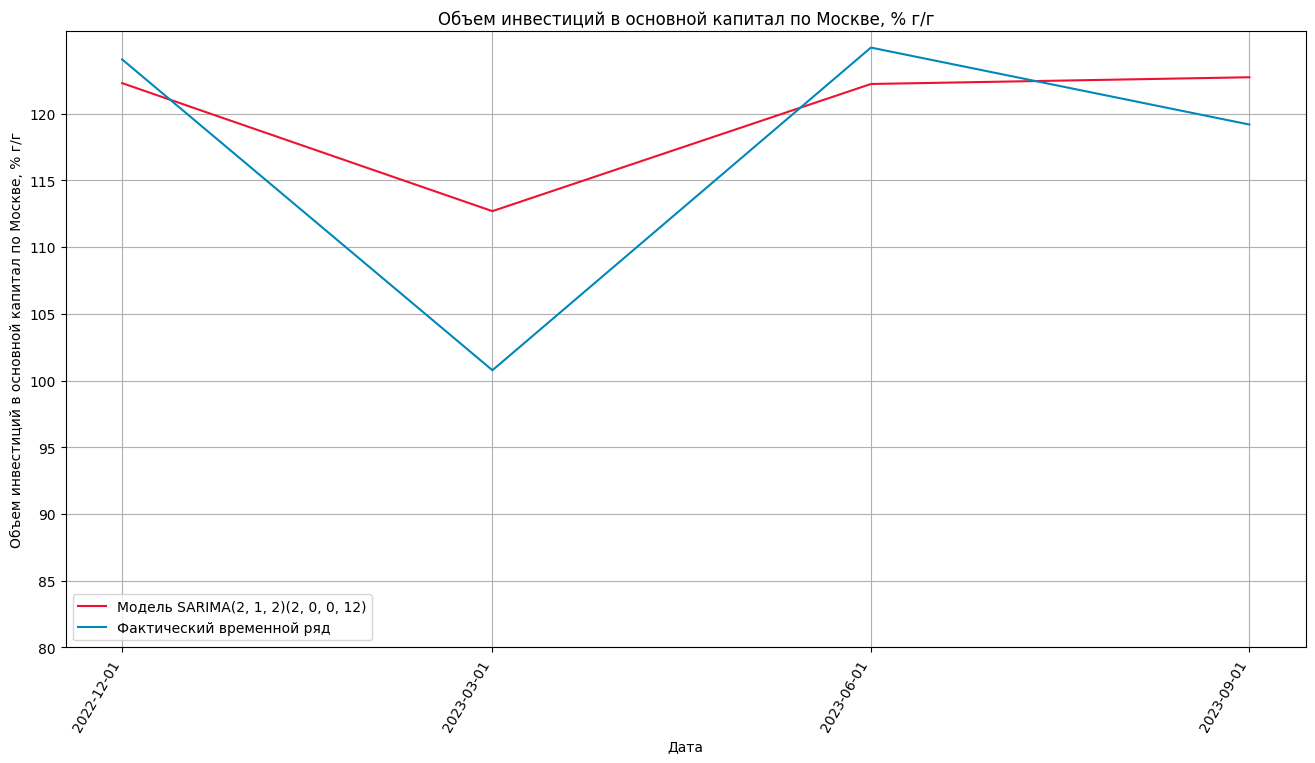

MSE: 41.32139239513675
MAE: 4.993318376097907
R^2: 0.5661298086011775
RMSE: 6.428171777040245


In [46]:
from dateutil import parser
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Объем инвестиций в основной капитал по Москве, % г/г']].copy()


plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Объем инвестиций в основной капитал по Москве, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Москве, % г/г')  
plt.title('График объема инвестиций в основной капитал в Москве')  


p, d, q = 2, 1, 2

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Объем инвестиций в основной капитал по Москве, % г/г'][:-4], order=(p, d, q), seasonal_order=(0, 0, 4, 4))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Объем инвестиций в основной капитал по Москве, % г/г'][:-4]), end=len(df['Объем инвестиций в основной капитал по Москве, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-4:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-4:], data_index['Объем инвестиций в основной капитал по Москве, % г/г'][-4:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-4:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Москве, % г/г')   
plt.title('Объем инвестиций в основной капитал по Москве, % г/г')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Объем инвестиций в основной капитал по Москве, % г/г'][-4:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Объем инвестиций в основной капитал по Москве, % г/г'][-4:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Объем инвестиций в основной капитал по Москве, % г/г'][-4:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Объем инвестиций в основной капитал по Москве, % г/г'][-4:], SARIMA_predictions)))

In [47]:
with open('investment_m_yoy.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


15    122.280354
16    112.689355
17    122.216839
Name: predicted_mean, dtype: float64


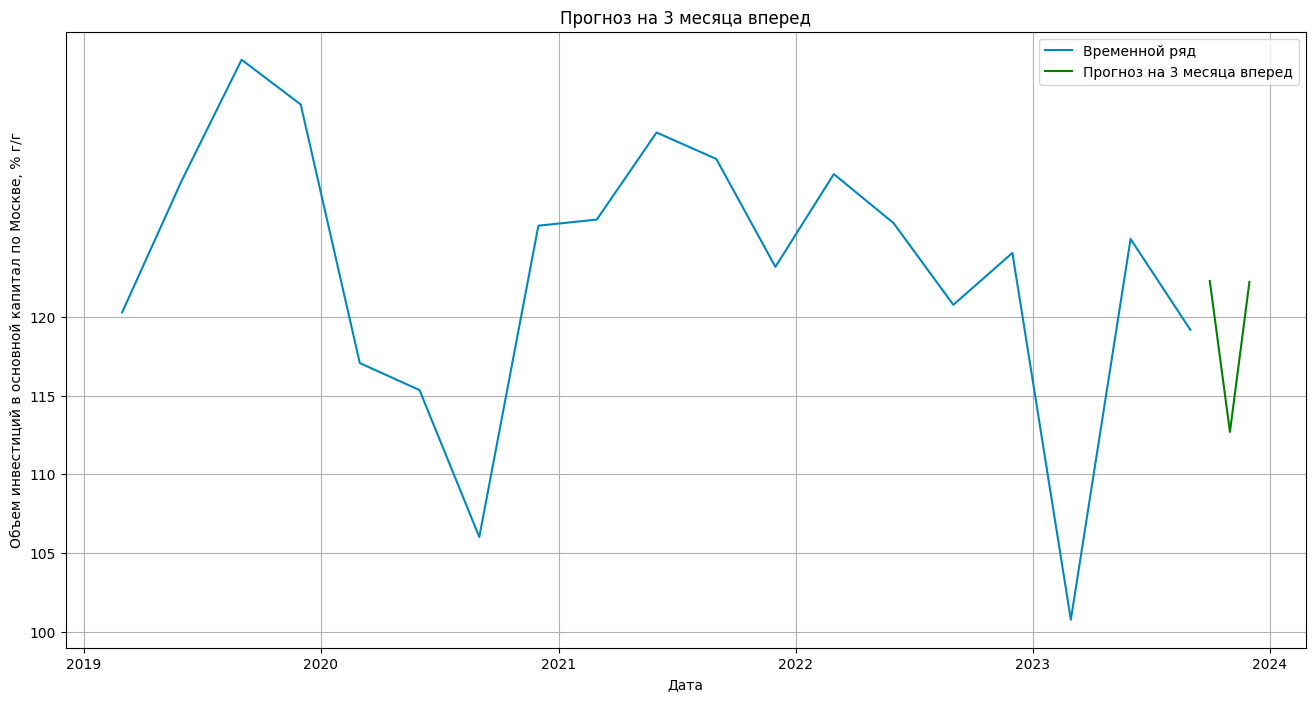

In [35]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по Москве, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Москве, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Объем инвестиций в основной капитал по Московской области, % г/г

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


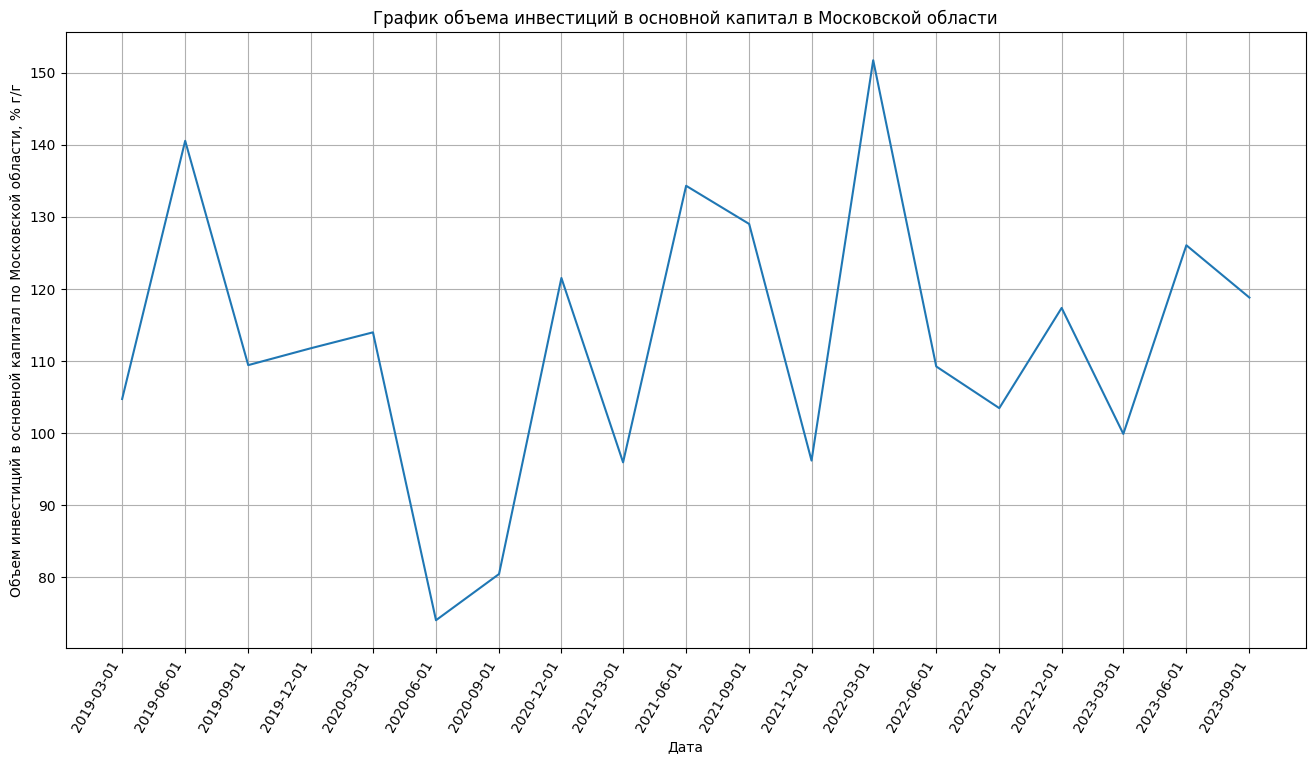

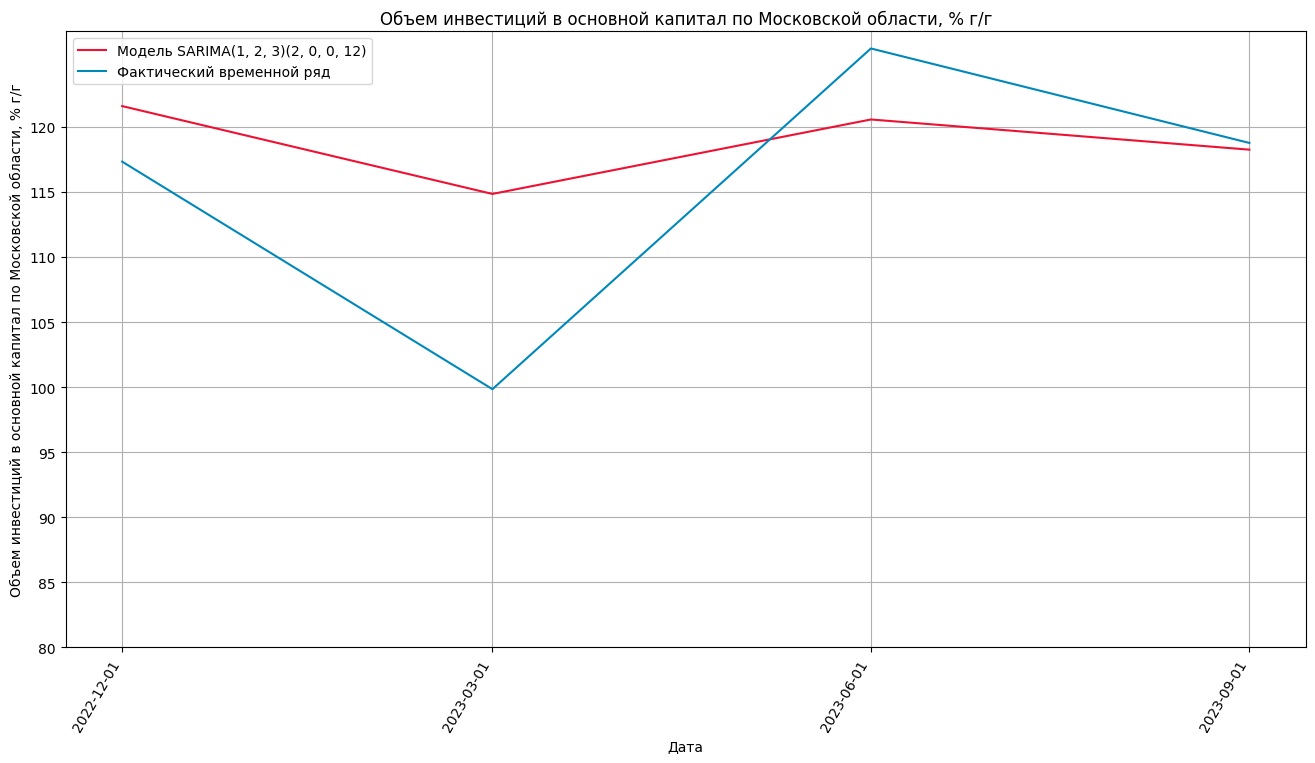

MSE: 68.33300171865669
MAE: 6.31070004993272
R^2: 0.2610355688009317
RMSE: 8.266377787075587


In [48]:
from dateutil import parser
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Объем инвестиций в основной капитал по Московской области, % г/г']].copy()


plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Объем инвестиций в основной капитал по Московской области, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Московской области, % г/г')  
plt.title('График объема инвестиций в основной капитал в Московской области')  


p, d, q = 1, 2, 3

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][:-4], order=(p, d, q), seasonal_order=(0, 0, 0, 4))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][:-4]), end=len(df['Объем инвестиций в основной капитал по Московской области, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-4:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-4:], data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][-4:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-4:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Московской области, % г/г')   
plt.title('Объем инвестиций в основной капитал по Московской области, % г/г')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][-4:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][-4:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][-4:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Объем инвестиций в основной капитал по Московской области, % г/г'][-4:], SARIMA_predictions)))

In [ ]:
with open('investment_mo_yoy.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

15    121.599629
16    114.849041
17    120.571249
Name: predicted_mean, dtype: float64


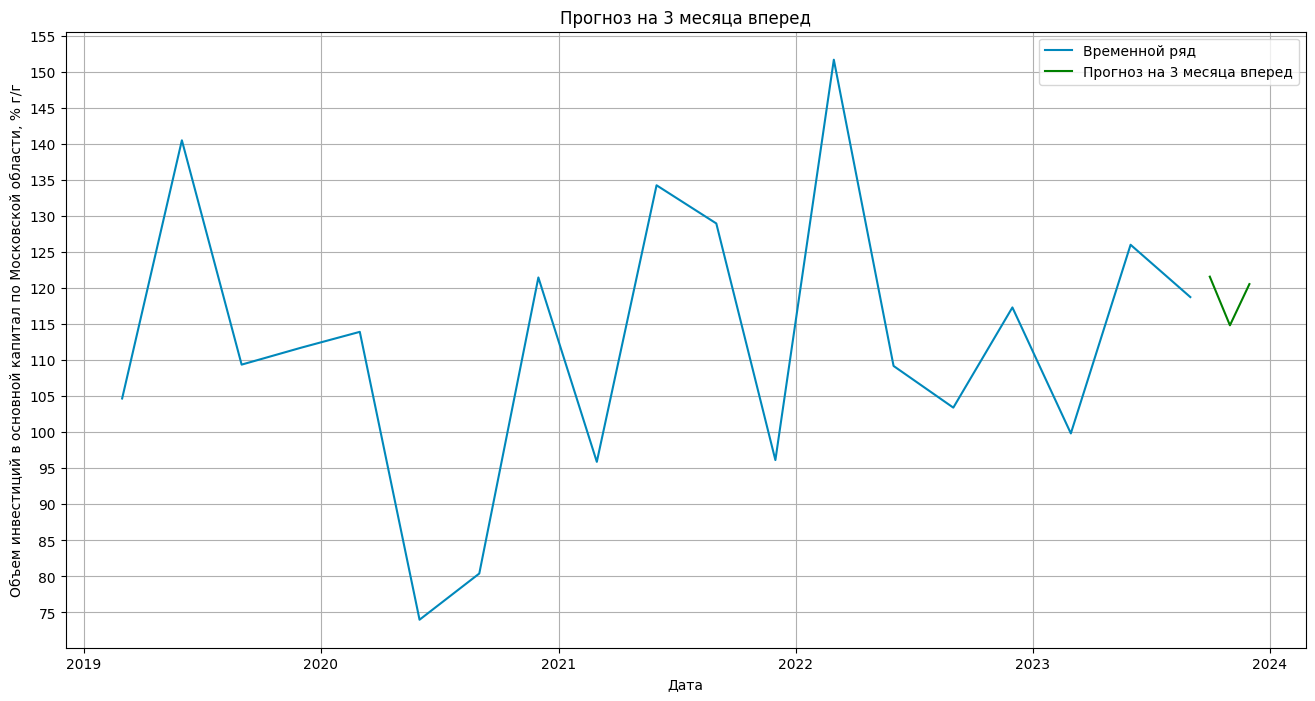

In [40]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по Московской области, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Московской области, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()